Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = ""

---

In [2]:
%matplotlib inline
%precision 16
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

#import sklearn.learn_model
#import sklearn.model.selection
#import sklearn.metrics

#from sklearn.linear_model import LogisticRegression
#from sklearn.model.selection import train_test_split
from sklearn.metrics import confusion_matrix


# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length or less (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Problem Description [15 pts]

In 2-4 paragraphs, describe the general problem you want to solve and the goals you hope to achieve. You should provide any relevant background and references, particularly if you are reproducing results from a paper.  Please use proper spelling and grammar. 


The goal of effectively predicting elections has been a dream for many people who enjoy mathematical modeling ever since accurate data on elections first became widely available after the rise of the Internet. Modern forecasting methods first became popularized by Nate Silver and his blog FiveThirtyEight after he successfully predicted the outcomes for 49 out of 50 states during the 2012 presidential elections, accurately calling the election for Obama by a wider (and more correct) margin than many news outlets at the time. The method that FiveThirtyEight uses soon became the standard for how election forecasting is done, and relies on a “poll of polls” strategy - rather than collecting themselves, FiveThirtyEight instead aggregate polls and “score” them by their methodology, weighing each one by historic accuracy and so called “house effects” in favor of one side or another, and then base a model on these aggregated polls. When the polls are accurate, this model is extremely powerful, and studies have consistently shown that accurate polls are the most effective predictors of election outcome that we know of.


However, during the 2016 and later 2020 election, the credibility of this model took an enormous hit, as polling across the country was completely blindsided by the election of Donald Trump. Polls were shown to consistently and dramatically underrate Trump’s level of support with blue collar white voters, especially in the Midwest. The polls were also unable to capture the massive changes in turnout generated by Trump’s candidacy- oftentimes, Hillary Clinton received the margin of votes she needed to earn to win the presidential election  key urban counties such as Dane County in Wisconsin, Wayne County in Michigan, and Broward County in Florida, only for the margin in those countries to get completely swamped by tens of thousands of new voters showing up to the polls in rural, sparsely populated counties whose population had never been factored into the models because they had never shown up to the polls before. Despite attempts to fix this problem by weighing white working class voters more heavily in the 2020 election, the exact same polling miss occurred in 2020, where what was predicted at one point to be a massive Biden blowout became an election decided by only tens of thousands of votes in a few key states, exactly like 2016. 

This indicates that the issue is not with the polling models, but with the polls themselves - white working class voters are either being overlooked in polling, giving false responses to pollsters (such as in the “shy Trump voter” effect) or being unresponsive to efforts to poll their preferences. Since this issue is so pervasive, it throws into doubt the relaibility of a polls-based model in predicting elections, and raises the possibility of shifting to a different paradigm of election prediction. This new paradigm would be one where elections are fortcasted according to their “fundementals”: characteristics of the candidates, national environment, and electorate that are widely believed to decide the vast majority of elections. The idea that these baseline characteristics and not the ability of canidates to sway voters (represented by the ups and downs of polls) is something that historically has been frowned upon, but lately has gained more traction as a result of the increased polarization of American politics, which has placed more and emphasis on “turning out” the voters on one’s own side rather than persuading voters on the other.


Another development that has occurred in the last few years has been the widespread usage of machine learning techniques in data analysis and the prediction market. The need for large quantities of easily accessed, accurate data has always been an issue in building accurate machine learning models. Data is often sparse on local and state races due to a lack of resources dedicated to collecting it, while national races occur infrequently enough to make the tens of thousands of datatpoints needed to make an accurate ML model hard to find. However, with the decrease in the accuracy of polling that does not seem to be going away anytime soon, the possibility of basing a model on regression-based techniques on the fundamentals deserves a second look, one which will be provided in this project. I will attempt to predict the outcome of House races from the last cycle using a “fundementals” based model that incorporates publically available data on a variety of sources, including fundraising data, unemployment rates, educuation rates, and demographic data to test the viability of a world without accurate polls.

## Problem Justification [5 pts] 

Briefly describe why this problem is important to you,  and, if possible, to anyone else.

In my opinion, this problem is of vital importance to the future of American democracy.The ability of both parties to be able to compete for control of the levers of government is vital for a functioning democracy to exist. However, the recent drop in the accuracy of polling has lead to a huge handicap for the Democratic Party, causing them to waste millions in resources in elections such as the Montana, Kentucky, Iowa and Maine Senate races that polls indicated were extremely close but in reality were decided by more than five points each, indicating that these races were never as competitive as they seemed. 

This waste of resources by the national Democratic party organization is no joke- in races decided by a tens of thousands of votes out of tens of millions cast, every single dollar of campaign contributions must be optimized to go where it is needed the most. The Clinton campaign’s belief that they had locked up the Midwestern states such as Michigan, Wisconsin, and Pennsylvania, caused them to travel to states like Arizona during the last days of the 2016 election, potentially costing them the presidency. As a result, finding an accurate way to predict the potential outcome of an election is more vital than ever before.

## Computational  Methods [10 pts]

Briefly describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain how the methods work, but you should briefly justify your choices. 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**



YOUR ANSWER HERE

The specific approach that I would like to use is one that involves machine learning techiniques to predict the total amount of votes cast for Democratic canidates in House elections. Turnout is an essential part of predicting election outcomes, and one where the results have been the most lacking during recent election cycles. Gathering publically availible data and performing feature engineering on the combined dataset, I will apply various techniques in machine learning and assess their accuracy. 

To keep it simple as a proof of concept, I will be working with some of the most standard ways to generate predictions: using linear regression, ridge regression, and logistic regression. I will be primarily employing the sklearn package for machine learning in Python, although for some predictions I will be deriving the model myself to show how the methods work under the hood. 

I intend to use the Pandas package in Python to do the data manipualtion required to get the data into a format where we can apply these methods. I also intend to use R for data manipulation- although Python also has packages for the kind of work I did in R, after first attempting to wrangle the data in Python I found that using R for things like the manipulation of charecter strings produced superior results and justified its use in the project.

In [3]:
# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage
# from somepackage import blah

import numpy 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn import metrics as metrics



## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first code block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code. 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.

### Modeling with Linear Regression

We will begin by taking a look at a model based on Linear Regression. Linear Regression describes the relationship between a prediction variable, represented as the matrix X, and a response variable, represented as the response variable y, with the relationship between the two assumed to be linear. The relationship between the predictor and the response variable is:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +  ... + \beta_n x_n + \epsilon
$$

where $\epsilon$ is the error term and is assumed to be normally distributed.

The specific type of Linear Regression we are working with is called Ordinary Least Squares, and works under a set of initial conditions. The equation for the estimator $\beta$ that defines our predictied relationship is given by:

$$
 \beta = (X^{T}X)^{-1}X^{T} y
$$

The preconditions are:

1. That the relationship between the predictor and the response is linear

2. That the data is gathered from a random sample

3. That the conditional mean of the errors with respect to our predictors is zero

4. That there is no multi-collinearity in the model

One of the risks in this project is that our models are to simple to account for the relationship between the predictors and the response, and that some of our preconditions are violated by the nature of the data and what we are trying to predict. For example, recent data has indicated that one of our predictors, income, does not have a linear relationship with democratic vote share in the district, with the relationship normally being inversely porportional but becoming directly porportional at the highest levels of income (although this trend is still new). However, asssesing how this model perfoms will still tell us a lot about how a fundementals onlt model works, and is worth trying.  

Below is code that I used to manipulate the data to get it into a place where I could start to implement the model. The code is in R, and thus not functional in the Jupyter Notebooks enviornment, although I have included it for the sake of completeness.

R Code for data manipulation and cleaning (non-functional within the Jupyter Notebooks enviornment):

In [4]:
#### installing the needed R tidyverse packages

#install.packages("readr")
#install.packages("dplyr")
#install.packages("tidyr")
#install.packages("stringr")
#library(tidyr)
#library(readr)
#library(dplyr)
#library(stringr)


#### the predictor data was gathered from a variety of sources, including campaign disclosures and census data

#predictor_data <- read_csv("District_Info_2020_Stats_Num_Altered.csv")

#predictor_data <- predictor_data[, colSums(is.na(predictor_data)) < nrow(predictor_data)]

#drops <- c("...60","...61","...62")

#predictor_data <- predictor_data[,!(names(predictor_data) %in% drops)]


#### the house data is readily availible through a variety of publically availible sources (see references below)

#results_data <- read_csv("house_candidate.csv")

#won <- ifelse(results_data$won == TRUE, 1, 0)

#results_data$won <- won

#results_data <- results_data[results_data$party == "DEM",]


The datasets were in different formats, so to be able to make them compatible and merge them I had to maipulate them using charecter strings, an R-specific tool that allowed me to selectively mutate, combine and relplace columns of data and their observations

In [5]:
#results_data <- separate(results_data, col = district, into = c("State", "Number"), sep = "('s)")

#for( i in 1:nrow(results_data)){
#  if (is.na(results_data$Number[i])){
#    results_data$Number(i) <- 1
#  }

#  else{
#    results_data$Number[i] <- substr(results_data$Number(i), 1, 3)
#    results_data$Number[i] <- str_replace(results_data$Number(i), "n", "")
#    results_data$Number[i] <- str_replace(results_data$Number(i), "r", "")
#    results_data$Number[i] <- str_replace(results_data$Number(i), "t", "")
#  }
#}

#for( i in 1:nrow(results_data)){
#  results_data$State[i] <- str_replace(results_data$State(i), "at large", "")
#  results_data$State[i] <- str_replace(results_data$State(i), "(:punct:)", "")
#}

#results_data$number <- as.numeric(results_data$Number)

#results_data <- results_data(!(is.na(results_data$number)),)

#results_data$Number <- as.double(results_data$Number)

In [6]:
# defining the min-max-norm for normalizing the data

#min_max_norm <- function(x) {

#    (x - min(x)) / (max(x) - min(x))
#}

#merged_data$total_votes <- min_max_norm(merged_data$total_votes)



# joining the two data sets together and selecting the predictors I believe are most important

# see references for more sources that I used to make edjuctated descisons on what 
# variables to use

#merged_data <- left_join(results_data, predictor_data, by = c("State", "Number"))

#merged_data <- na.omit(merged_data)

#merged_data <- subset(merged_data, select = c("Over 18", "White", "Median Income", "Graduation %", "Unemployment...21", "Bachelor", "16 Rep Vote", "16 Dem Vote", "18 Inc", "16 Funds Got", "16 Funds Spent", "won", "total_votes"))


## writing the combined data set to a csv file to be used later in the project

#write_csv(x = merged_data, file ="merged_election_data2.csv")

Now that the data is in a format that we can work with, we can finally apply the packages that we first downloaded earlier. The variable that I decided to predict is the total number of votes that a canidate recieves- since the number of people in a house district are designed by the census to be similar to each other in terms of popluation, the number of blowouts on each side being roughly proportional as well, and the fact that vote count can act as a proxy for a lot of different things (turnout, voter enthusiasm, etc) makes it a variable worth predicting.

Next let's take a look at how different models perform with respect to each other.

A sample of our predicted vote totals: [151749.5   129725.    139303.375 202687.5   139268.125 160236.5
 152705.125 135674.25  140434.875 273576.625]

Our RMSE for the linear model is 33947.285 and our R-Squared value is 0.648
Our RMSE for the ridge model is 34101.84335 and our R-Squared value is 0.645


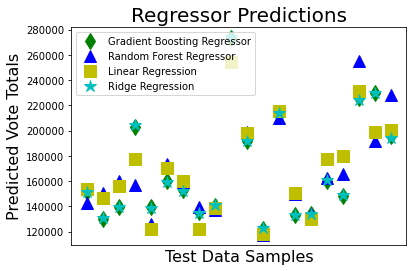

In [7]:
## See references

import numpy

election_data = pd.read_csv("merged_election_data2.csv")
election_data = pd.DataFrame(election_data)

Y = election_data["total_votes"]

#newX = election_data.drop("total_votes", axis = 1)

newX = election_data.drop("total_votes", axis = 1)
#linreg = LinearRegression()

#X_train, X_test, Y_train, Y_test = train_test_split( newX, Y, test_size = 0.3, random_state = 3 )

X_train, X_test, Y_train, Y_test = train_test_split( newX, Y, test_size = 0.3, random_state = 3 )
                

lin_reg = LinearRegression()


## changing the value of alpha can tune the results
ridge_reg = Ridge(alpha = 0.01)

grad_reg = GradientBoostingRegressor(random_state=1)

rf_reg = RandomForestRegressor(random_state=1)


## using the training data to fit each model
lin_reg.fit(X_train, Y_train)

ridge_reg.fit(X_train, Y_train)

grad_reg.fit(X_train, Y_train)

rf_reg.fit(X_train, Y_train)

#lin_reg_train_score = lin_reg.score(X_train, Y_train)
lin_reg_test_score = lin_reg.score(X_test, Y_test)


#Ridge_train_score = ridge_reg.score(X_train, Y_train)
#Ridge_test_score = ridge_reg.score(X_test, Y_test)

#print(lin_reg_test_score)

#print(Ridge_test_score)



# generating our predictions based on the model
y_pred1 = lin_reg.predict(X_test)
y_pred2 = ridge_reg.predict(X_test)
y_pred3 = grad_reg.predict(X_test)
y_pred4 = rf_reg.predict(X_test)

print("A sample of our predicted vote totals:", y_pred1[:10])
print()

mse1 = metrics.mean_squared_error(Y_test, y_pred1) 
lin_reg_r2 = metrics.r2_score(Y_test, y_pred1)

print("Our RMSE for the linear model is", numpy.round(numpy.sqrt(mse1), 3), "and our R-Squared value is", numpy.round(lin_reg_r2, 3))

mse2 = metrics.mean_squared_error(Y_test, y_pred2) 
ridge_reg_r2 = metrics.r2_score(Y_test, y_pred2)

print("Our RMSE for the ridge model is", numpy.round(numpy.sqrt(mse2), 5), "and our R-Squared value is", numpy.round(ridge_reg_r2, 3))


plt.figure()

plt.rcParams["figure.figsize"] = (20,8)

plt.plot(y_pred1[:20], "gd", label="Gradient Boosting Regressor", markersize = "12")
plt.plot(y_pred4[:20], "b^", label="Random Forest Regressor", markersize = "12")
plt.plot(y_pred3[:20], "ys", label="Linear Regression", markersize = "12")
plt.plot(y_pred2[:20], "c*", label="Ridge Regression", markersize = "12")


plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted Vote Totals", fontsize = 16)
plt.xlabel("Test Data Samples", fontsize = 16)
plt.legend(loc="best")
plt.title("Regressor Predictions", fontsize = 20)

plt.show()



As we can see, the predictions made by each regression tend to be highly similar to each other, with the predictions made by the Linear Regression and the Random Forest generally clustering together and the predictions made by Ridge Regression and Gradient Boost appearing similarly clustered. The R-Squared Value of our model suggests that some relationship between our predictors and response variables exists, but leaves much to be desired. Before we move further into the predictions, let's take a closer look at our predictor variables.

In [8]:
print(election_data.columns)

Index(['Over 18', 'White', 'Median Income', 'Graduation %',
       'Unemployment...21', 'Bachelor', '16 Rep Vote', '16 Dem Vote', '18 Inc',
       '16 Funds Got', '16 Funds Spent', 'won', 'total_votes'],
      dtype='object')



The predictor variables shown above were choosen based on reading literature on the biggest parts of the Democratic Party's coalition as well as indicators of the strength of the canidates, and with a focus on variables that could be easily quantified. The Democratic Party has traditionally done well when there is a higher share of the non-white vote in their district (with the last Democratic president to win the white vote being LBJ in the landslide election of 1964), as well as in districts where the age of the voters is lower. The Democratic Party has also traditionally done well when the district has a high share of the population that holds a bachelors degree, as well as where the distribution of voters that have graduated high school is high as well. 

When it comes to income, Democrats do when the voting base is either very high or very low, with middle income voters tending to side with Republicans. The incumbancy of a particular canidate and whether or not they won their race are represented by an indicator variable, with canidates who are incumbants tending to hold an advantage because they have high name recognition within their district, as well as because incumbants tend to ward off strong challanges for the seat. Funding is also a key variable in success, with canidates who are well funded usually beating rivals who are not. Some of these trends have been changing in recent times, with Democrats taking a higher share of upper-middle class voters as well as a lower share of voters who have not graduated college (especially in the Midwest) but overall these trends are good predictors of success for a Democratic candiate in a particular house seat in the current political enviornment.  

### Modeling with Logistic Regression

The nature of our data, with binary nature of our canidate winning or losing being represented by an indicator variable that is eiter zero or one, lends our data to working with Logistic Regression. Logistic Regression uses the sigmoid function to map all of our inputs from $R$ onto the interval $[0,1]$, where the sigmoid function is defined as:

$$
\sigma(x) = \frac{1}{ 1 + e^{-x}}
$$


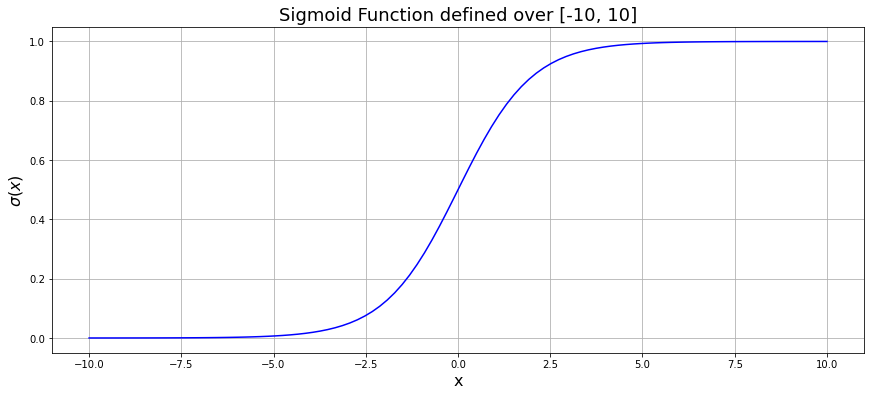

In [9]:
x = numpy.linspace(-10, 10, 100)

def sigmoid(x):
    return 1/(1 + numpy.exp(-x))

fig = plt.figure(figsize = (16,6))
fig.set_figwidth(fig.get_figwidth()*2)

axis = fig.add_subplot(1, 2, 1,)
sig_plot = axis.plot(x, sigmoid(x), "b")
axis.set_xlabel("x", fontsize = 16)
axis.set_ylabel("$\sigma(x)$", fontsize = 16 )
axis.set_title("Sigmoid Function defined over [-10, 10]", fontsize = 18)
plt.grid()

plt.show()

For our logistic regression, we need to define a loss function that is different from the Mean Squared Error that we used in Linear Regression. We can take advantage of the fact that the variable we are trying to predict will always be zero or one in this derivation. 

Let's start by defining $\mathbb{P}(y = 1 | X = x) = h(x; \theta)$ and $\mathbb{P}(y = 0 | X = x) =  1 - h(x; \theta)$ , where $\theta$ is our parameter, $y$ is the variable we want to predict, and $x$ are the observations of our data from the feature matrix $X$.

The Likelihood function $L(\theta)$ is definied of the product of all of the different probabilities of our data set, which gives us: 

$$
 L(\theta) = \prod_{i=1, y = y_i}^{n} \mathbb{P}(y = 1 | X = x)*\prod_{i=1, y = y_i}^{n} { 1 - \mathbb{P}(y = 1 | X = x) }
$$

Since we are doing logistic regression we know that $h(x; \theta) = \sigma(\theta_{0} + \theta_{1}x) $. Taking the log on the loss function to make it easier to work with, and since the monotonic nature of the log function preserves the maximums and minimums the value that minimizes it will be the same. Putting it all together and adding a negative sign to minimize a loss instead of maximizing a likelihood we get:

$$
 L(\theta) = - \sum_{i=1}^{n} y_{i} \log (\mathbb{P}(y = 1 | X = x; \theta)) + (1 - y_i) \log({ 1 - \mathbb{P}(y = 1 | X = x ; \theta) })
$$

Finding $argmin_{\theta} L(\theta)$ will give us the value that we want.

Now let's implement logistic regression on our data set and see what we get (with help from the references mentioned below): 

In [10]:
import warnings
warnings.filterwarnings( "ignore" )


class Logistic_Regression():
    
    def __init__( self, rate, iterations):
        
        self.rate = rate
        
        self.iterations = iterations
        
        
    def fit(self, feature_matrix, response_variable):
        
        self.feature_matrix = feature_matrix
        
        self.observations, self.features = feature_matrix.shape
        
        self.weights = numpy.zeros(self.features)
        
        self.b = 0
        
        self.response_variable = response_variable
        
        for iters in range(self.iterations):
            self.grad_descent()
        return self
              
        
    def grad_descent(self):
        
        arg = self.feature_matrix.dot(self.weights) + self.b
        
        sigmoid = 1/(1 + numpy.exp(-arg))
        
        temp = sigmoid - self.response_variable.T
        
        temp = numpy.reshape(temp, self.observations)
        
        delta_weights = numpy.dot(self.feature_matrix.T, temp)/self.observations
        
        self.weights = self.weights - delta_weights*self.rate
        
        delta_b = numpy.sum(temp)/self.observations
        
        self.b = self.b - delta_b*self.rate
        
        return self
    
    
    def predict(self, feature_matrix):
        
        final_arg = feature_matrix.dot(self.weights) + self.b
        
        sigmoid = 1/(1 + numpy.exp(-final_arg))
        
        predictions = numpy.where(sigmoid > 0.5, 0, 1)
        
        return predictions
        

Sample of predicted outcomes [1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 1]


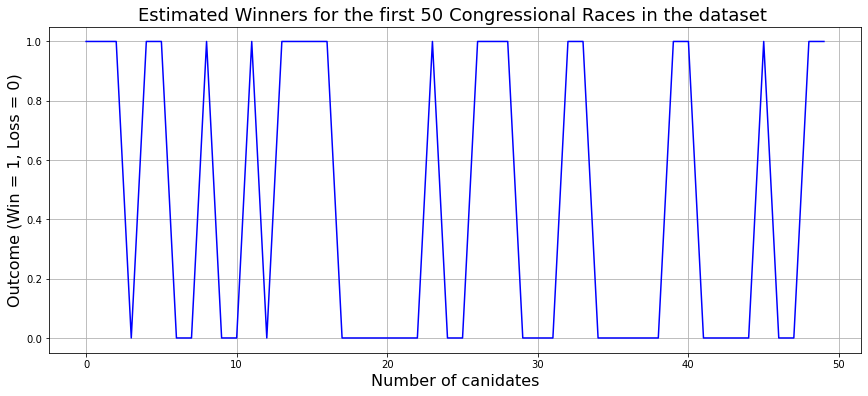

Our model predicts that Democrats should win 46.0 percent of House seats
In 2020, Democrats actually won 51.0 percent of House seats


In [11]:
def main():
    
    Y = election_data["won"]
    
    neewX = election_data.drop("won", axis = 1)

    X_train, X_test, Y_train, Y_test = train_test_split( newX, Y, test_size = 0.3, random_state = 3 )
       
    logistic_model = Logistic_Regression( rate = 0.01, iterations = 1000)
    
    logistic_model.fit(X_train, Y_train)
    
    Y_pred = logistic_model.predict(X_test)
    
    fig = plt.figure(figsize = (16,6))
    fig.set_figwidth(fig.get_figwidth()*2)
    
    print("Sample of predicted outcomes", Y_pred[1:50])
    
    
    axis = fig.add_subplot(1, 2, 1,)
    vote_total_plot = axis.plot(Y_pred[:50], "b")
    axis.set_xlabel("Number of canidates", fontsize = 16)
    axis.set_ylabel("Outcome (Win = 1, Loss = 0)", fontsize = 16 )
    axis.set_title("Estimated Winners for the first 50 Congressional Races in the dataset ", fontsize = 18)
    plt.grid()

    plt.show()
    
    print("Our model predicts that Democrats should win", 100*numpy.round(sum(Y_pred)/len(Y_pred), 2), "percent of House seats")
    
    print("In 2020, Democrats actually won", 100*numpy.round(221/435, 2), "percent of House seats")
    


if __name__ == "__main__" :     
    main()
        

In [12]:
def errors(f,F):
    """ calculate various measures of error of an object f and its approximation F
    
    Parameters
    ----------
    f:  numpy.array (or float)
        array of true values
        
    F: numpy.array
        array of approximate values
        
    Returns
    -------
    
    e: array of absolute errors
    r: array of relative errors
    p: integer array of precisions
    """
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    e = numpy.abs(numpy.subtract(f,F))
    r = e/numpy.abs(f)
    v = numpy.vectorize(int)
    p = v(-numpy.log10(r/5))
    return e, r, p

In [13]:
# test with array input
f = Y_test
F = Y_pred

e,r,p = errors(f,F)

numpy.testing.assert_allclose(Y_pred, Y_test)

print('passed array test')

NameError: name 'Y_pred' is not defined

#### Modeling with Ridge Regression 

Ridge Regression is an extension of Linear regression where in addition to the normal penalty term used in OLS, there is the inclusion of a lambda parameter, which acts to minimize the size of our parameter estimates so that the new equation for the cost becomes:

$$
 L(\beta) = || y - X\beta||^{2} - \lambda||\beta||^{2}
$$

where $\beta$ is our estimate for the coefficiants.

The implementation of Ridge Regression is similar to that used in Logistic Regression, except the equation used in calculating the gradient descent, except the change in our weights will be slightly different. The predictions function also becomes simplified as the data no longer has to pass through the sigmoid function. 

In [ ]:
%pdb
## see references
class Ridge_Regression():
      
    def __init__( self, rate, iterations, penalty):
    
        self.rate = rate 
       
        self.iterations = iterations
        
        self.penalty = penalty

        
    def fit(self, feature_matrix, response_variable):
        
        self.feature_matrix = feature_matrix
        
        self.observations, self.features = feature_matrix.shape
        
        self.weights = numpy.zeros(self.features)
        
        self.b = 0
        
        self.response_variable = response_variable
        
        for iters in range(self.iterations):
            self.grad_descent()
        return self

    
    def grad_descent(self):
        
        Y_pred = self.predict(self.feature_matrix)
                  
        delta_weigths = (-(2*(self.feature_matrix.T).dot(self.response_variable - Y_pred))+(2*self.l2_penalty*self.weights))/self.observations
        
        self.weights = self.weights - delta_weights*self.rate
        
        delta_b = -2*numpy.sum(self.response_variable - Y_pred)/self.observations
        
        self.b = self.b - delta_b*self.rate
        
        return self
    
    
    def predict(self, feature_matrix):
        
        predictions = feature_matrix.dot(self.weights) + self.b
        
        return predictions
    
          
def main():
    
    Y = election_data['total_votes']
    
    neewX = election_data.drop('total_votes', axis = 1)

    X_train, X_test, Y_train, Y_test = train_test_split( newX, Y, test_size = 0.3, random_state = 3 )
     
    ridge_model = Ridge_Regression(iterations = 100, rate = 0.01, penalty = 1)
    
    ridge_model.fit( X_train, Y_train )
      
    Y_pred = ridge_model.predict(X_test)
    
    fig = plt.figure(figsize = (16,6))
    fig.set_figwidth(fig.get_figwidth()*2)
    
    print("Sample of predicted outcomes", Y_pred[1:50])
    
    
    axis = fig.add_subplot(1, 2, 1,)
    vote_total_plot = axis.plot(y_pred2[:50], "b")
    axis.set_xlabel("Races", fontsize = 16)
    axis.set_ylabel("Predicted Number of Votes", fontsize = 16 )
    axis.set_title("Estimated Number of Democratic Votes for the first 50 Congressional Races in the dataset ", fontsize = 18)
    plt.grid()

    plt.show()
    
      
if __name__ == "__main__" : 
    main()

## Discussion [10 pts]

Discuss the results of your code including 
* Why do you believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


YOUR ANSWER HERE

* Why do you believe that your numerical results are correct (convergence, test cases etc)?

While the numerical results of the regressions show decent accuracy, with the results for logistic regression being very close to the percentage win rate in 2020, the fact that the input data may have violated some of the conditions for the Ordinary Least Squares Model (heteroskedasticity, normal distribution of the errors, etc) give me reason to doubt the accuracy of the model, and lend credence to the idea that overfitting may be occurring. After all, polls have consistantly been shown to be the best way to predict the results of election, and it takes a lot of accuracy in the ground truth data to make up for this. Additionally, the small sample size of the data set (by necessity) means that ML models are at an inherent disadvantage. 


* Did the project work (in your opinion)?

In my opinion, the project did not work to the fullest extent that it could have- it shows that models based on the fundementals can produce decently accurate results, but with huge caveats attached. Unfortunately, I do not think the model fufilled the original goal I set out to solve: to create a path towards a viable alternative to polling. Additionally, the test block that I attemped to create was unsucessful, indicating that there may be some issues with the model (or my approach to testing it's veracity).


* If no:  Explain why your approach did not work and what you would do differently next time:


I think that the model would benefit from more advanced techiques such as XGBoost, Random Forest, Stochastic Gradient Descent and others. This would free the model from the limitations of the Least Squares prerequisites and allow us to build more detail into the model through more data. Additionally, I would read research on comparative politics to see if I could incorporate data from elections in other countries to expand the amount of data that I can use. Exapanding the data set into the tens of thousands in a responsible mannaer would unlock the full potential of ML methods and allow me to see where the restrictions on the model itself can be fixed.


References:

https://www.pewresearch.org/methods/2020/09/08/democrats-made-gains-from-multiple-sources-in-2018-midterm-victories/

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/42MVDX

https://www.geeksforgeeks.org/implementation-of-ridge-regression-from-scratch-using-python/?ref=lbp

https://www.geeksforgeeks.org/mathematical-explanation-for-linear-regression-working/?ref=lbp

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

https://www.dailykos.com/stories/2018/2/21/1742660/-The-ultimate-Daily-Kos-Elections-guide-to-all-of-our-data-sets

https://www.kaggle.com/unanimad/us-election-2020

https://www.geeksforgeeks.org/implementation-of-logistic-regression-from-scratch-using-python/

https://stats.stackexchange.com/questions/304988/understanding-the-logistic-regression-and-likelihood
